In [50]:
import numpy as np
import sklearn
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn import  ensemble, preprocessing, metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import os
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

## 資料讀取與前處理

In [51]:
#讀取資料 
df = pd.read_csv("D:\\HC\\碩士班課程\\機器學習原理\\Student Depression Dataset.csv")
path = "D:\\HC\\碩士班課程\\機器學習原理\\" #設定存檔路徑

In [52]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [53]:
# 篩選出 City 欄位中出現次數大於等於 300 的城市，刪除那些出現次數小於 300 的行。
df=df[df['City'].map(df['City'].value_counts())>=300]
df['City'].value_counts()
print(df['City'].value_counts())
# 刪除 Financial Stress 欄位
df=df.drop(['Financial Stress'],axis=1)

Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: City, dtype: int64


In [54]:
# 篩選出 Profession 欄位中是學生的資料，刪除其他的行。
df['Profession'].value_counts()
df=df[df['Profession']=='Student']
df['Profession'].value_counts()

Student    27844
Name: Profession, dtype: int64

In [55]:
# 篩選出 Age 欄位中<35的資料，刪除其他的行。
df=df[df['Age']<35.0]
df['Age'].value_counts()

24.0    2255
20.0    2235
28.0    2128
29.0    1940
33.0    1892
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
34.0    1466
27.0    1459
31.0    1422
32.0    1258
22.0    1159
26.0    1153
30.0    1144
Name: Age, dtype: int64

In [56]:
# 刪除具有工作壓力者
df=df[df['Work Pressure']==0.0]
df['Work Pressure'].value_counts()

0.0    27793
Name: Work Pressure, dtype: int64

In [57]:
#刪除無學業壓力者
df['Academic Pressure'].value_counts() 
df=df[df['Academic Pressure']!=0.0]
df['Academic Pressure'].value_counts()

3.0    7430
5.0    6268
4.0    5142
1.0    4783
2.0    4165
Name: Academic Pressure, dtype: int64

In [58]:
#刪除學習滿意度為0者
df=df[df['Study Satisfaction']!=0.0]
df['Study Satisfaction'].value_counts()

4.0    6338
2.0    5821
3.0    5796
1.0    5426
5.0    4404
Name: Study Satisfaction, dtype: int64

In [59]:
#刪除睡眠時長為其它者
df=df[df['Sleep Duration']!='Others']
df['Sleep Duration'].value_counts()

Less than 5 hours    8281
7-8 hours            7313
5-6 hours            6152
More than 8 hours    6021
Name: Sleep Duration, dtype: int64

In [60]:
#刪除飲食習慣為其他者
df=df[df['Dietary Habits']!='Others']
df['Dietary Habits'].value_counts()

Unhealthy    10272
Moderate      9868
Healthy       7615
Name: Dietary Habits, dtype: int64

In [61]:
#重新編碼畢業狀況
df['Degree'].value_counts()
graduated = ['B.Ed', 'B.Com', 'B.Arch', 'BCA', 'B.Tech', 'BHM', 'BSc', 'B.Pharm', 'BBA', 'BE', 'BA']
post_graduated = ['MSc', 'MCA', 'M.Tech', 'M.Ed', 'M.Com', 'MBBS', 'LLB', 'M.Pharm', 'MD', 'MBA', 'MA', 'PhD', 'LLM', 'MHM', 'ME']
high_school = ['Class 12', 'Others']


# Iterate over the 'Degree' column and update its values
df['Degree']=df['Degree'].replace(graduated,'graduated')
df['Degree']=df['Degree'].replace(post_graduated,'post-graduated')
df['Degree']=df['Degree'].replace(high_school,'high_school')

In [62]:
df['Age'].astype('int') #轉換資料型態

0        33
1        24
2        31
3        28
4        25
         ..
27896    27
27897    27
27898    31
27899    18
27900    27
Name: Age, Length: 27755, dtype: int32

In [63]:
#將City做One-Hot-Encording
df=pd.get_dummies(df,columns=['City'],prefix='City_',drop_first=True);

In [64]:
#刪除不要的欄位
df=df.replace({False:0,True:1})
df=df.drop(['Profession','Work Pressure','Job Satisfaction'],axis=1)
df.head()

,id,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City__Patna,City__Pune,City__Rajkot,City__Srinagar,City__Surat,City__Thane,City__Vadodara,City__Varanasi,City__Vasai-Virar,City__Visakhapatnam
0,2,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,graduated,Yes,...,0,0,0,0,0,0,0,0,0,1
1,8,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,graduated,No,...,0,0,0,0,0,0,0,0,0,0
2,26,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,graduated,No,...,0,0,0,1,0,0,0,0,0,0
3,30,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,graduated,Yes,...,0,0,0,0,0,0,0,1,0,0
4,32,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,post-graduated,Yes,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#重新編碼
df.loc[df['Gender']=='Male','Gender']=1;
df.loc[df['Gender']=='Female','Gender']=0;
# 確保資料型態為數值型
df['Gender'] = df['Gender'].astype(int)

In [66]:
# 計算 0 和 1 的數量
gender_counts = df['Gender'].value_counts()

# 印出結果
print(f"Gender = 0 的數量 (Female): {gender_counts.get(0, 0)}")
print(f"Gender = 1 的數量 (Male): {gender_counts.get(1, 0)}")

Gender = 0 的數量 (Female): 12281
Gender = 1 的數量 (Male): 15474


In [67]:
#重新編碼
df.loc[df['Sleep Duration']=='Less than 5 hours','Sleep Duration']=3
df.loc[df['Sleep Duration']=='5-6 hours','Sleep Duration']=2
df.loc[df['Sleep Duration']=='7-8 hours','Sleep Duration']=1
df.loc[df['Sleep Duration']=='More than 8 hours','Sleep Duration']=0
# 確保資料型態為數值型
df['Sleep Duration'] = df['Sleep Duration'].astype(int)

In [68]:
# 計算 0 和 1 的數量
Sleep_counts = df['Sleep Duration'].value_counts()

# 印出結果
print(f"More than 8 hours 的數量: {Sleep_counts.get(0, 0)}")
print(f"7-8 hours 的數量: {Sleep_counts.get(1, 0)}")
print(f"5-6 hours 的數量: {Sleep_counts.get(2, 0)}")
print(f"Less than 5 hours 的數量: {Sleep_counts.get(3, 0)}")

More than 8 hours 的數量: 6020
7-8 hours 的數量: 7310
5-6 hours 的數量: 6149
Less than 5 hours 的數量: 8276


In [69]:
#重新編碼
df.loc[df['Dietary Habits']=='Unhealthy','Dietary Habits']=2
df.loc[df['Dietary Habits']=='Moderate','Dietary Habits']=1
df.loc[df['Dietary Habits']=='Healthy','Dietary Habits']=0
# 確保資料型態為數值型
df['Dietary Habits'] = df['Dietary Habits'].astype(int)

In [70]:
# 計算 0 和 1 的數量
Dietary_counts = df['Dietary Habits'].value_counts()

# 印出結果
print(f"Healthy 的數量: {Dietary_counts.get(0, 0)}")
print(f"Moderate 的數量: {Dietary_counts.get(1, 0)}")
print(f"Unhealthy 的數量: {Dietary_counts.get(2, 0)}")

Healthy 的數量: 7615
Moderate 的數量: 9868
Unhealthy 的數量: 10272


In [71]:
#重新編碼
df.loc[df['Degree']=='post-graduated','Degree']=2
df.loc[df['Degree']=='graduated','Degree']=1
df.loc[df['Degree']=='high_school','Degree']=0
# 確保資料型態為數值型
df['Degree'] = df['Degree'].astype(int)

In [72]:
# 計算 0 和 1 的數量
Degree_counts = df['Degree'].value_counts()

# 印出結果
print(f"high_school 的數量: {Degree_counts.get(0, 0)}")
print(f"graduated 的數量: {Degree_counts.get(2, 0)}")
print(f"post-graduated 的數量: {Degree_counts.get(1, 0)}")

high_school 的數量: 6089
graduated 的數量: 9752
post-graduated 的數量: 11914


In [73]:
#重新編碼
df.loc[df['Have you ever had suicidal thoughts ?']=='Yes','Have you ever had suicidal thoughts ?']=1
df.loc[df['Have you ever had suicidal thoughts ?']=='No','Have you ever had suicidal thoughts ?']=0
# 確保資料型態為數值型
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype(int)

In [74]:
# 計算 0 和 1 的數量
thoughts_counts = df['Have you ever had suicidal thoughts ?'].value_counts()

# 印出結果
print(f"No 的數量: {thoughts_counts.get(0, 0)}")
print(f"Yes 的數量: {thoughts_counts.get(1, 0)}")

No 的數量: 10187
Yes 的數量: 17568


In [75]:
#重新編碼
df.loc[df['Family History of Mental Illness']=='Yes','Family History of Mental Illness']=1
df.loc[df['Family History of Mental Illness']=='No','Family History of Mental Illness']=0
# 確保資料型態為數值型
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype(int)

In [76]:
# 計算 0 和 1 的數量
Illness_counts = df['Family History of Mental Illness'].value_counts()

# 印出結果
print(f"No 的數量: {Illness_counts.get(0, 0)}")
print(f"Yes 的數量: {Illness_counts.get(1, 0)}")

No 的數量: 14325
Yes 的數量: 13430


In [77]:
df

,id,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City__Patna,City__Pune,City__Rajkot,City__Srinagar,City__Surat,City__Thane,City__Vadodara,City__Varanasi,City__Vasai-Virar,City__Visakhapatnam
0,2,1,33.0,5.0,8.97,2.0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,8,0,24.0,2.0,5.90,5.0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26,1,31.0,3.0,7.03,5.0,3,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,30,0,28.0,3.0,5.59,2.0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,32,0,25.0,4.0,8.13,3.0,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,0,27.0,5.0,5.75,5.0,2,2,0,1,...,0,0,0,0,1,0,0,0,0,0
27897,140686,1,27.0,2.0,9.40,3.0,3,0,2,0,...,0,0,0,0,0,0,0,0,0,0
27898,140689,1,31.0,3.0,6.61,4.0,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
27899,140690,0,18.0,5.0,6.88,2.0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# 計算每個特徵的平均值和標準差
mean_df = pd.DataFrame({
    "Feature": df.columns,               # 特徵名稱
    "Mean": df.mean().values,            # 平均值
    "Standard Deviation": df.std().values  # 標準差
})

# 顯示結果
print(mean_df)

                                  Feature          Mean  Standard Deviation
0                                      id  70441.794704        40640.194119
1                                  Gender      0.557521            0.496689
2                                     Age     25.794163            4.862945
3                       Academic Pressure      3.141884            1.380555
4                                    CGPA      7.658624            1.465798
5                      Study Satisfaction      2.944731            1.359966
6                          Sleep Duration      1.601009            1.126943
7                          Dietary Habits      1.095730            0.797069
8                                  Degree      1.131976            0.743872
9   Have you ever had suicidal thoughts ?      0.632967            0.482004
10                       Work/Study Hours      7.162205            3.705719
11       Family History of Mental Illness      0.483877            0.499749
12          

In [79]:
import pandas as pd

# 假設檔案已讀取到 DataFrame df
# 確認 'Depression' 欄位存在
if 'Depression' not in df.columns:
    raise ValueError("The 'Depression' column does not exist in the DataFrame!")

# 分離資料
normal = df[df['Depression'] == 0]  # 'Depression' 為 0 的資料
block = df[df['Depression'] == 1]  # 'Depression' 為 1 的資料

# 將資料分別存成檔案
normal.to_csv('normal.csv', index=False)  # 儲存 normal 資料
block.to_csv('block.csv', index=False)  # 儲存 block 資料

# 顯示分離結果資訊
print(f"Normal data saved with {len(normal)} rows.")
print(f"Block data saved with {len(block)} rows.")


Normal data saved with 11498 rows.
Block data saved with 16257 rows.


In [80]:
#資料分割(80-20先切割再合併)

normal_train, normal_test = train_test_split(normal, train_size=0.8)
block_train, block_test = train_test_split(block, train_size=0.8)
train_data = pd.concat([block_train,normal_train], axis = 0)
test_data = pd.concat([block_test,normal_test], axis = 0)

In [81]:
normal_test

,id,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City__Patna,City__Pune,City__Rajkot,City__Srinagar,City__Surat,City__Thane,City__Vadodara,City__Varanasi,City__Vasai-Virar,City__Visakhapatnam
12281,62078,1,20.0,2.0,5.91,3.0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3976,19886,1,34.0,1.0,9.01,3.0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
8743,44143,1,29.0,2.0,9.39,2.0,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
8448,42533,0,27.0,4.0,9.41,1.0,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
14984,75577,1,33.0,1.0,7.47,1.0,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22611,114013,0,34.0,1.0,5.74,4.0,1,0,2,0,...,0,1,0,0,0,0,0,0,0,0
10503,53228,1,33.0,4.0,5.12,5.0,3,1,2,0,...,0,0,0,0,0,0,0,0,1,0
44,294,0,23.0,1.0,7.85,4.0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
21742,109779,1,26.0,2.0,9.41,4.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
block_test

,id,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City__Patna,City__Pune,City__Rajkot,City__Srinagar,City__Surat,City__Thane,City__Vadodara,City__Varanasi,City__Vasai-Virar,City__Visakhapatnam
17395,87979,1,27.0,1.0,7.24,3.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
21975,110965,0,29.0,5.0,5.37,4.0,3,1,2,1,...,0,0,0,0,0,0,0,0,0,1
7320,36844,0,19.0,5.0,5.70,5.0,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
15385,77591,1,24.0,4.0,6.75,1.0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
20219,102357,0,25.0,5.0,5.98,5.0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13984,70854,1,25.0,5.0,6.51,3.0,2,0,2,1,...,0,0,0,0,0,0,0,0,0,0
25104,126525,1,21.0,3.0,8.58,1.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
759,3928,0,22.0,1.0,7.22,1.0,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9782,49318,0,24.0,1.0,8.74,5.0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
block.dtypes

id                                         int64
Gender                                     int32
Age                                      float64
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                             int32
Dietary Habits                             int32
Degree                                     int32
Have you ever had suicidal thoughts ?      int32
Work/Study Hours                         float64
Family History of Mental Illness           int32
Depression                                 int64
City__Ahmedabad                            int64
City__Bangalore                            int64
City__Bhopal                               int64
City__Chennai                              int64
City__Delhi                                int64
City__Faridabad                            int64
City__Ghaziabad                            int64
City__Hyderabad     

In [84]:
block.columns

Index(['id', 'Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Family History of Mental Illness', 'Depression', 'City__Ahmedabad',
       'City__Bangalore', 'City__Bhopal', 'City__Chennai', 'City__Delhi',
       'City__Faridabad', 'City__Ghaziabad', 'City__Hyderabad', 'City__Indore',
       'City__Jaipur', 'City__Kalyan', 'City__Kanpur', 'City__Kolkata',
       'City__Lucknow', 'City__Ludhiana', 'City__Meerut', 'City__Mumbai',
       'City__Nagpur', 'City__Nashik', 'City__Patna', 'City__Pune',
       'City__Rajkot', 'City__Srinagar', 'City__Surat', 'City__Thane',
       'City__Vadodara', 'City__Varanasi', 'City__Vasai-Virar',
       'City__Visakhapatnam'],
      dtype='object')

In [85]:
#設定input、output
train_X = train_data[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Family History of Mental Illness', 'City__Ahmedabad',
       'City__Bangalore', 'City__Bhopal', 'City__Chennai', 'City__Delhi',
       'City__Faridabad', 'City__Ghaziabad', 'City__Hyderabad', 'City__Indore',
       'City__Jaipur', 'City__Kalyan', 'City__Kanpur', 'City__Kolkata',
       'City__Lucknow', 'City__Ludhiana', 'City__Meerut', 'City__Mumbai',
       'City__Nagpur', 'City__Nashik', 'City__Patna', 'City__Pune',
       'City__Rajkot', 'City__Srinagar', 'City__Surat', 'City__Thane',
       'City__Vadodara', 'City__Varanasi', 'City__Vasai-Virar',
       'City__Visakhapatnam']]
train_y = train_data[['Depression']]

test_X = test_data[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Family History of Mental Illness', 'City__Ahmedabad',
       'City__Bangalore', 'City__Bhopal', 'City__Chennai', 'City__Delhi',
       'City__Faridabad', 'City__Ghaziabad', 'City__Hyderabad', 'City__Indore',
       'City__Jaipur', 'City__Kalyan', 'City__Kanpur', 'City__Kolkata',
       'City__Lucknow', 'City__Ludhiana', 'City__Meerut', 'City__Mumbai',
       'City__Nagpur', 'City__Nashik', 'City__Patna', 'City__Pune',
       'City__Rajkot', 'City__Srinagar', 'City__Surat', 'City__Thane',
       'City__Vadodara', 'City__Varanasi', 'City__Vasai-Virar',
       'City__Visakhapatnam']]
test_y = test_data[['Depression']]

data_X = df[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Family History of Mental Illness', 'City__Ahmedabad',
       'City__Bangalore', 'City__Bhopal', 'City__Chennai', 'City__Delhi',
       'City__Faridabad', 'City__Ghaziabad', 'City__Hyderabad', 'City__Indore',
       'City__Jaipur', 'City__Kalyan', 'City__Kanpur', 'City__Kolkata',
       'City__Lucknow', 'City__Ludhiana', 'City__Meerut', 'City__Mumbai',
       'City__Nagpur', 'City__Nashik', 'City__Patna', 'City__Pune',
       'City__Rajkot', 'City__Srinagar', 'City__Surat', 'City__Thane',
       'City__Vadodara', 'City__Varanasi', 'City__Vasai-Virar',
       'City__Visakhapatnam']]
data_y = df[['Depression']]

In [86]:
train_data.reset_index(inplace=True)


In [87]:
print("訓練集樣本數：", len(train_X))
print("測試集樣本數：", len(test_X))


訓練集樣本數： 22203
測試集樣本數： 5552


### 建立結果蒐集frame

In [88]:
#Data Frame 表頭

train_df = pd.DataFrame(columns=['Model name','dataset','accuarcy','precision','recall','f1-score','auc'])
test_df = pd.DataFrame(columns=['Model name','dataset','accuarcy','precision','recall','f1-score','auc'])

### 資料儲存

In [89]:
if not os.path.isdir(path+'train'):  # 確認儲存檔案位置 若沒有的話 則新建檔案
    os.makedirs(path+'train')

In [90]:
# train 預測結果

def train_result(pred, name, train_auc):
    global train_df
    accuracy = round(metrics.accuracy_score(train_y, pred), 2)
    precision = round(metrics.precision_score(train_y, pred), 2)
    recall = round(metrics.recall_score(train_y, pred), 2)
    f1_score_value = round(metrics.f1_score(train_y, pred), 2)
    auc_curve = round(train_auc, 2)
    
    
    df = pd.DataFrame({
        'Model name': name,
        'dataset': 'train',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1_score_value,
        'auc': auc_curve
    }, index=[0])
    
    
    train_df = pd.concat([train_df, df], axis=0, ignore_index=True)
    
    # Save the results to a CSV file
    train_df.to_csv(path + "\\train\\" + " train.csv")
    
    return train_df


In [91]:
if not os.path.isdir(path+'test'):  # 確認儲存檔案位置 若沒有的話 則新建檔案
    os.makedirs(path+'test')

In [92]:
# test 預測結果
def test_result(pred, name, test_auc):
    global test_df
    accuracy = round(metrics.accuracy_score(test_y, pred), 2)
    precision = round(metrics.precision_score(test_y, pred), 2)
    recall = round(metrics.recall_score(test_y, pred), 2)
    f1_score_value = round(metrics.f1_score(test_y, pred), 2)
    auc_curve = round(test_auc, 2)
    
    
    
    df = pd.DataFrame({
        'Model name': name,
        'dataset': 'test',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1_score_value,
        'auc': auc_curve
        
    }, index=[0])
    
    
    test_df = pd.concat([test_df, df], axis=0, ignore_index=True)
    
    # Save the results to a CSV file
    test_df.to_csv(path + "\\test\\"  + " test.csv")
    
    return test_df
    

## LightGBM

Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.528336	eval's binary_logloss: 0.543326
[20]	train's binary_logloss: 0.450462	eval's binary_logloss: 0.475373
[30]	train's binary_logloss: 0.406422	eval's binary_logloss: 0.438021
[40]	train's binary_logloss: 0.379213	eval's binary_logloss: 0.416457
[50]	train's binary_logloss: 0.361875	eval's binary_logloss: 0.404002
[60]	train's binary_logloss: 0.35052	eval's binary_logloss: 0.396737
[70]	train's binary_logloss: 0.342307	eval's binary_logloss: 0.39277
[80]	train's binary_logloss: 0.336211	eval's binary_logloss: 0.390457
[90]	train's binary_logloss: 0.331499	eval's binary_logloss: 0.389388
[100]	train's binary_logloss: 0.327464	eval's binary_logloss: 0.388425
[110]	train's binary_logloss: 0.323176	eval's binary_logloss: 0.387992
[120]	train's binary_logloss: 0.319777	eval's binary_logloss: 0.387731
[130]	train's binary_logloss: 0.316537	eval's binary_logloss: 0.387579
[140]	train's binary_loglos

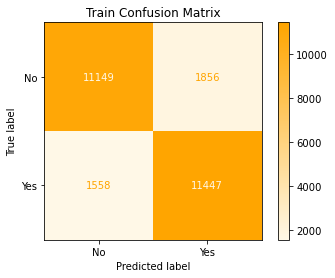

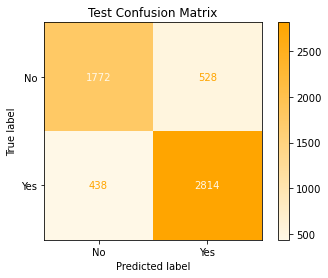

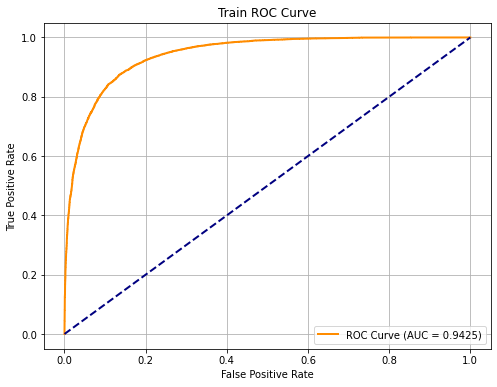

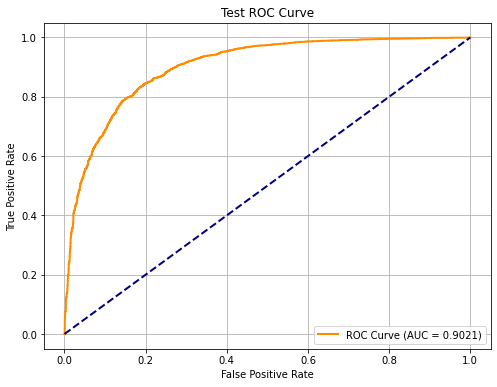


===== SHAP Analysis =====

===== Train SHAP Analysis =====


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


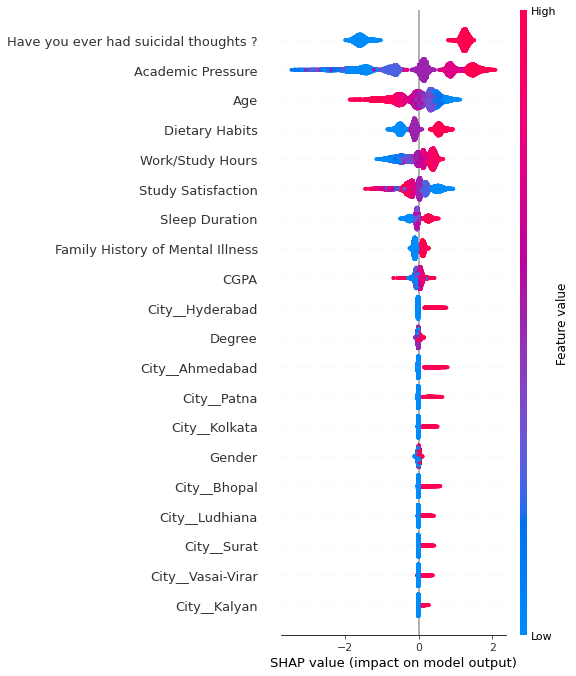

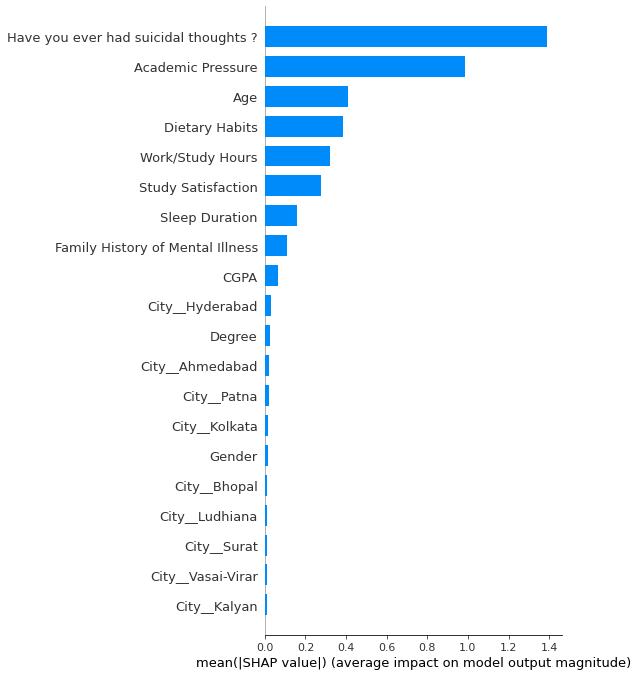


===== Test SHAP Analysis =====


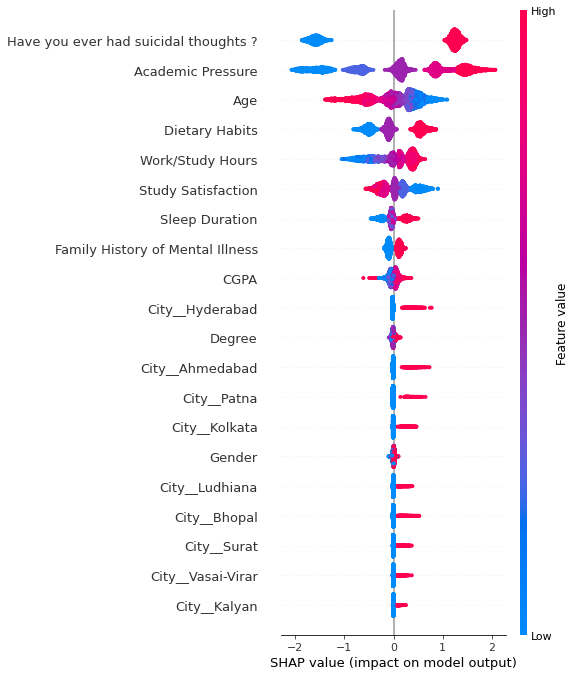

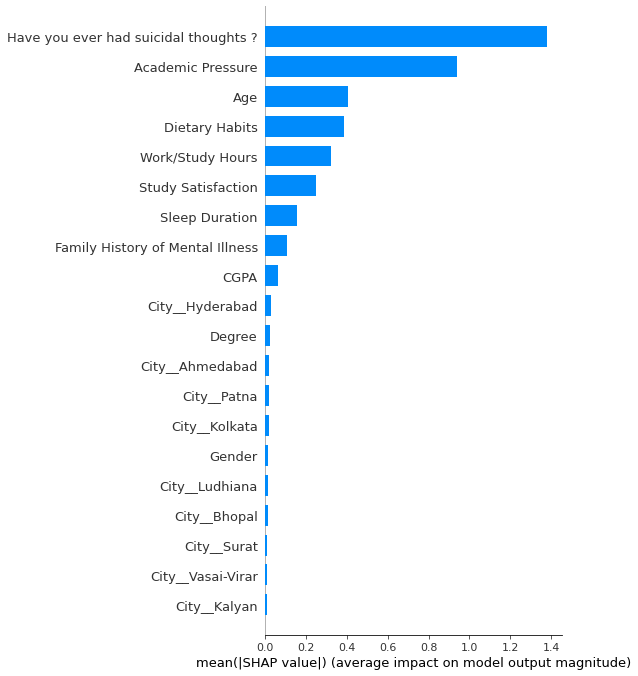


===== Learning Curve =====


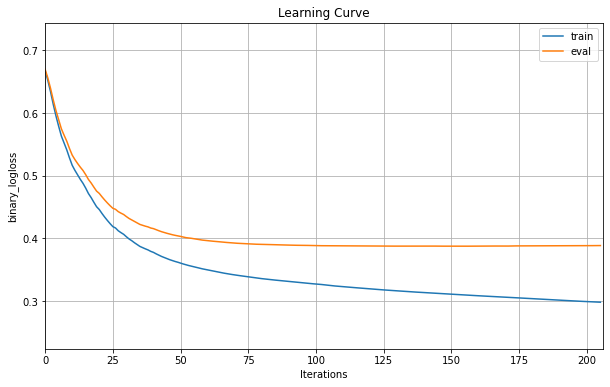

In [93]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

# 使用 SMOTE 平衡訓練資料
smote = SMOTE(random_state=42)
train_X_resampled, train_y_resampled = smote.fit_resample(train_X, train_y)


# 調整成LightGBM 需要的 Dataset 格式
lgb_train = lgb.Dataset(train_X_resampled, label=train_y_resampled)
lgb_eval = lgb.Dataset(test_X, label=test_y, reference=lgb_train)

# 設定超參數(未設定者採預設)
params = {
    'objective': 'binary',  # 二元分類
    'metric': 'binary_logloss',  # 評估指標
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'learning_rate': 0.05,  # 學習率
    'num_leaves': 31,  # 葉子節點數
    'max_depth': -1,  # 無限制樹深度
    'feature_fraction': 0.8,  # 特徵隨機抽樣比例
    'bagging_fraction': 0.8,  # 資料隨機抽樣比例
    'bagging_freq': 5,  # 每 5 次迭代進行一次隨機抽樣
    'verbose': -1,  # 禁止輸出過多訊息
    'random_state': 42  # 隨機種子
}

# 設置早停條件和記錄評估結果
evals_result = {}
callbacks = [
    lgb.early_stopping(stopping_rounds=50), # 如果模型在連續 50 次迭代中，驗證集的評估指標沒有改善，訓練將提前結束。
    lgb.log_evaluation(period=10), # 每 10 次迭代打印一次訓練過程的評估指標。
    lgb.record_evaluation(evals_result) # 記錄評估結果
]

# 訓練模型
gbm = lgb.train(
    params=params,  # 帶入超參數設定
    train_set=lgb_train,  # 選擇訓練資料
    valid_sets=[lgb_train, lgb_eval],
    valid_names=["train", "eval"],
    num_boost_round=1000, # 控制總共要建立1000棵決策樹
    callbacks=callbacks
)

# 預測
train_pred_prob = gbm.predict(train_X_resampled)
train_pred = (train_pred_prob > 0.5).astype(int)

test_pred_prob = gbm.predict(test_X)
test_pred = (test_pred_prob > 0.5).astype(int)

# 評估指標
def evaluate_results(y_true, y_pred, y_pred_prob, dataset_name="Dataset"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred_prob)
    print(f"\n===== {dataset_name} Evaluation =====")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc_score:.4f}")
    return accuracy, precision, recall, f1, auc_score

# 訓練集評估
evaluate_results(train_y_resampled, train_pred, train_pred_prob, "Train")

# 測試集評估
evaluate_results(test_y, test_pred, test_pred_prob, "Test")

# 繪製混淆矩陣
def plot_confusion_matrix(y_true, y_pred, dataset_name="Dataset"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No", "Yes"])
    
    # 自定義顏色
    cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["#fff8e7", "#ffa500"])
    
    disp.plot(cmap=cmap)  # 使用自定義的橙黃色
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.show()

# 繪製訓練集和測試集的混淆矩陣
plot_confusion_matrix(train_y_resampled, train_pred, "Train")
plot_confusion_matrix(test_y, test_pred, "Test")


# 繪製 ROC 曲線
def plot_roc_curve(y_true, y_pred_prob, dataset_name="Dataset"):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{dataset_name} ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

plot_roc_curve(train_y_resampled, train_pred_prob, "Train")
plot_roc_curve(test_y, test_pred_prob, "Test")

# SHAP 分析
print("\n===== SHAP Analysis =====")
explainer = shap.TreeExplainer(gbm)

# 訓練集 SHAP 分析
print("\n===== Train SHAP Analysis =====")
train_shap_values = explainer.shap_values(train_X_resampled)

# Train SHAP Summary Plot（散布圖）
shap.summary_plot(train_shap_values[1], train_X_resampled)
plt.show()

# Train SHAP Summary Plot（條形圖）
shap.summary_plot(train_shap_values[1], train_X_resampled, plot_type="bar")
plt.show()

# 測試集 SHAP 分析
print("\n===== Test SHAP Analysis =====")
test_shap_values = explainer.shap_values(test_X)

# Test SHAP Summary Plot（散布圖）
shap.summary_plot(test_shap_values[1], test_X)
plt.show()

# Test SHAP Summary Plot（條形圖）
shap.summary_plot(test_shap_values[1], test_X, plot_type="bar")
plt.show()

# 繪製學習曲線
print("\n===== Learning Curve =====")
lgb.plot_metric(evals_result, metric="binary_logloss", figsize=(10, 6))
plt.title("Learning Curve")
plt.show()


### 10-fold


===== Fold 1 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.529857	eval's binary_logloss: 0.541058
[20]	train's binary_logloss: 0.451711	eval's binary_logloss: 0.470786
[30]	train's binary_logloss: 0.407856	eval's binary_logloss: 0.43213
[40]	train's binary_logloss: 0.381082	eval's binary_logloss: 0.410024
[50]	train's binary_logloss: 0.363452	eval's binary_logloss: 0.397294
[60]	train's binary_logloss: 0.352375	eval's binary_logloss: 0.390753
[70]	train's binary_logloss: 0.344772	eval's binary_logloss: 0.386537
[80]	train's binary_logloss: 0.338636	eval's binary_logloss: 0.384276
[90]	train's binary_logloss: 0.333981	eval's binary_logloss: 0.382767
[100]	train's binary_logloss: 0.329829	eval's binary_logloss: 0.381977
[110]	train's binary_logloss: 0.325773	eval's binary_logloss: 0.381092
[120]	train's binary_logloss: 0.322473	eval's binary_logloss: 0.380668
[130]	train's binary_logloss: 0.3196	eval's binary_logloss: 0.381158
[140]	tr

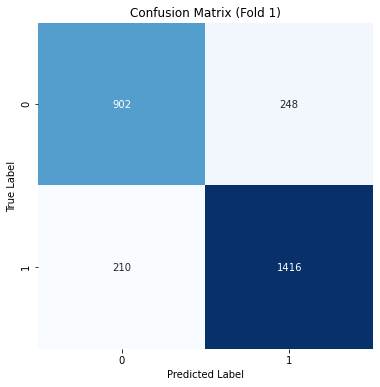

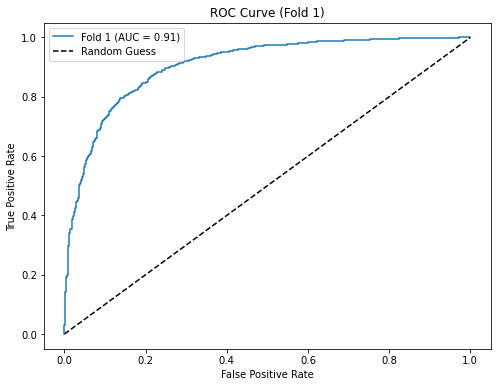


===== Fold 2 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.53055	eval's binary_logloss: 0.538141
[20]	train's binary_logloss: 0.454026	eval's binary_logloss: 0.468402
[30]	train's binary_logloss: 0.410347	eval's binary_logloss: 0.429006
[40]	train's binary_logloss: 0.383277	eval's binary_logloss: 0.405859
[50]	train's binary_logloss: 0.366025	eval's binary_logloss: 0.392088
[60]	train's binary_logloss: 0.355117	eval's binary_logloss: 0.385084
[70]	train's binary_logloss: 0.347251	eval's binary_logloss: 0.380272
[80]	train's binary_logloss: 0.341211	eval's binary_logloss: 0.378287
[90]	train's binary_logloss: 0.336063	eval's binary_logloss: 0.376979
[100]	train's binary_logloss: 0.331928	eval's binary_logloss: 0.376654
[110]	train's binary_logloss: 0.327965	eval's binary_logloss: 0.376323
[120]	train's binary_logloss: 0.324722	eval's binary_logloss: 0.375737
[130]	train's binary_logloss: 0.32158	eval's binary_logloss: 0.37617
[140]	tr

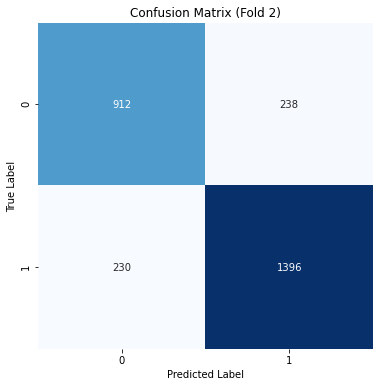

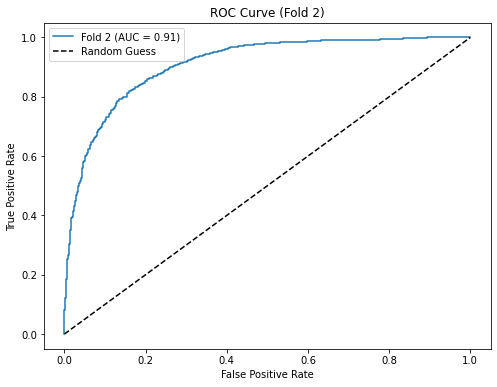


===== Fold 3 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.529578	eval's binary_logloss: 0.543218
[20]	train's binary_logloss: 0.452145	eval's binary_logloss: 0.47454
[30]	train's binary_logloss: 0.408396	eval's binary_logloss: 0.437124
[40]	train's binary_logloss: 0.38148	eval's binary_logloss: 0.415861
[50]	train's binary_logloss: 0.364011	eval's binary_logloss: 0.403148
[60]	train's binary_logloss: 0.353008	eval's binary_logloss: 0.396683
[70]	train's binary_logloss: 0.344776	eval's binary_logloss: 0.392421
[80]	train's binary_logloss: 0.339029	eval's binary_logloss: 0.3897
[90]	train's binary_logloss: 0.33413	eval's binary_logloss: 0.387896
[100]	train's binary_logloss: 0.329737	eval's binary_logloss: 0.386916
[110]	train's binary_logloss: 0.325884	eval's binary_logloss: 0.386362
[120]	train's binary_logloss: 0.322543	eval's binary_logloss: 0.385892
[130]	train's binary_logloss: 0.319516	eval's binary_logloss: 0.385394
[140]	trai

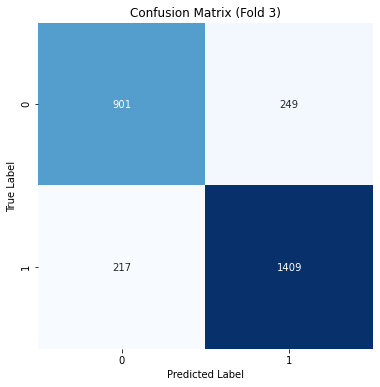

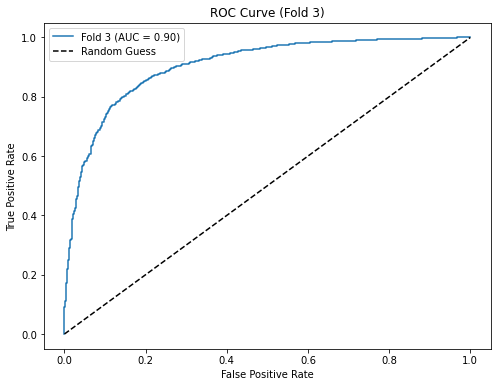


===== Fold 4 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.529544	eval's binary_logloss: 0.541548
[20]	train's binary_logloss: 0.452008	eval's binary_logloss: 0.472917
[30]	train's binary_logloss: 0.408499	eval's binary_logloss: 0.43465
[40]	train's binary_logloss: 0.381789	eval's binary_logloss: 0.412347
[50]	train's binary_logloss: 0.364321	eval's binary_logloss: 0.398952
[60]	train's binary_logloss: 0.35343	eval's binary_logloss: 0.39092
[70]	train's binary_logloss: 0.345579	eval's binary_logloss: 0.38653
[80]	train's binary_logloss: 0.339933	eval's binary_logloss: 0.383821
[90]	train's binary_logloss: 0.335044	eval's binary_logloss: 0.382169
[100]	train's binary_logloss: 0.3311	eval's binary_logloss: 0.381102
[110]	train's binary_logloss: 0.32706	eval's binary_logloss: 0.380385
[120]	train's binary_logloss: 0.32354	eval's binary_logloss: 0.380086
[130]	train's binary_logloss: 0.320341	eval's binary_logloss: 0.379954
[140]	train's

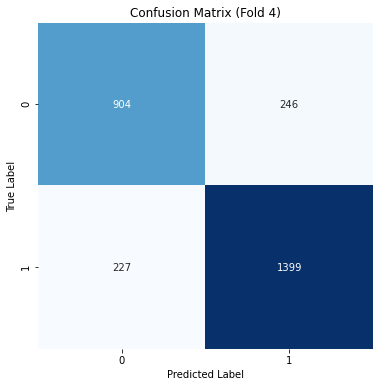

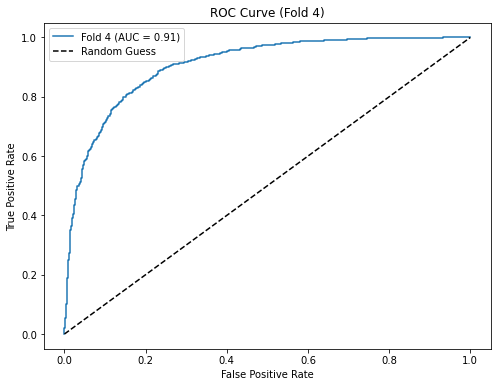


===== Fold 5 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.527936	eval's binary_logloss: 0.552602
[20]	train's binary_logloss: 0.449718	eval's binary_logloss: 0.488391
[30]	train's binary_logloss: 0.40564	eval's binary_logloss: 0.454672
[40]	train's binary_logloss: 0.378306	eval's binary_logloss: 0.435117
[50]	train's binary_logloss: 0.360889	eval's binary_logloss: 0.424015
[60]	train's binary_logloss: 0.349931	eval's binary_logloss: 0.418139
[70]	train's binary_logloss: 0.34224	eval's binary_logloss: 0.414968
[80]	train's binary_logloss: 0.336541	eval's binary_logloss: 0.413275
[90]	train's binary_logloss: 0.331418	eval's binary_logloss: 0.411561
[100]	train's binary_logloss: 0.327391	eval's binary_logloss: 0.411101
[110]	train's binary_logloss: 0.323945	eval's binary_logloss: 0.411202
[120]	train's binary_logloss: 0.320693	eval's binary_logloss: 0.411244
[130]	train's binary_logloss: 0.317626	eval's binary_logloss: 0.41144
[140]	tr

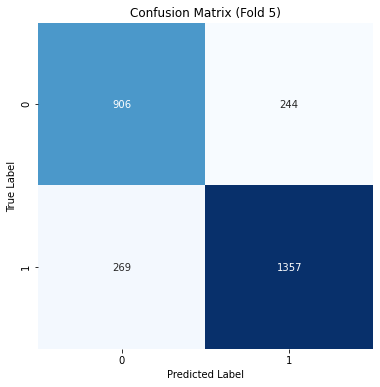

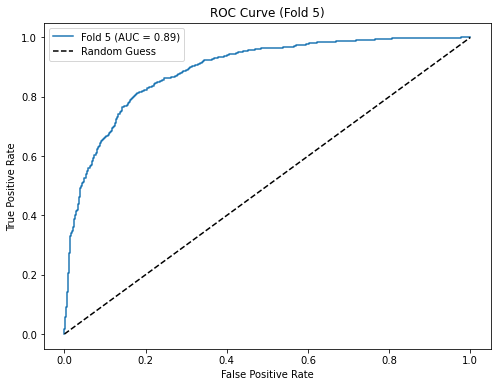


===== Fold 6 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.529325	eval's binary_logloss: 0.542347
[20]	train's binary_logloss: 0.451907	eval's binary_logloss: 0.473151
[30]	train's binary_logloss: 0.408361	eval's binary_logloss: 0.43497
[40]	train's binary_logloss: 0.381342	eval's binary_logloss: 0.413499
[50]	train's binary_logloss: 0.364093	eval's binary_logloss: 0.400331
[60]	train's binary_logloss: 0.352857	eval's binary_logloss: 0.393965
[70]	train's binary_logloss: 0.345227	eval's binary_logloss: 0.39062
[80]	train's binary_logloss: 0.339149	eval's binary_logloss: 0.388258
[90]	train's binary_logloss: 0.33432	eval's binary_logloss: 0.387091
[100]	train's binary_logloss: 0.330151	eval's binary_logloss: 0.386468
[110]	train's binary_logloss: 0.326689	eval's binary_logloss: 0.385831
[120]	train's binary_logloss: 0.323571	eval's binary_logloss: 0.385691
[130]	train's binary_logloss: 0.320224	eval's binary_logloss: 0.38563
[140]	tra

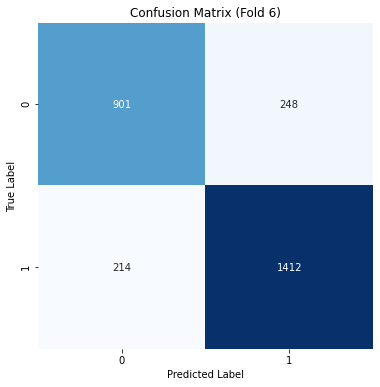

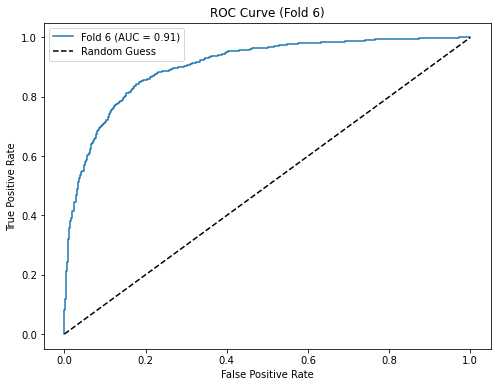


===== Fold 7 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.529081	eval's binary_logloss: 0.545375
[20]	train's binary_logloss: 0.451749	eval's binary_logloss: 0.478756
[30]	train's binary_logloss: 0.408071	eval's binary_logloss: 0.443235
[40]	train's binary_logloss: 0.381136	eval's binary_logloss: 0.4224
[50]	train's binary_logloss: 0.363533	eval's binary_logloss: 0.41046
[60]	train's binary_logloss: 0.352287	eval's binary_logloss: 0.403877
[70]	train's binary_logloss: 0.344027	eval's binary_logloss: 0.400239
[80]	train's binary_logloss: 0.338032	eval's binary_logloss: 0.398532
[90]	train's binary_logloss: 0.333129	eval's binary_logloss: 0.39751
[100]	train's binary_logloss: 0.32866	eval's binary_logloss: 0.396605
[110]	train's binary_logloss: 0.324875	eval's binary_logloss: 0.396271
[120]	train's binary_logloss: 0.321616	eval's binary_logloss: 0.396235
[130]	train's binary_logloss: 0.318555	eval's binary_logloss: 0.395586
[140]	trai

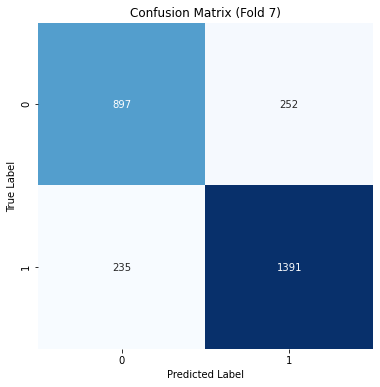

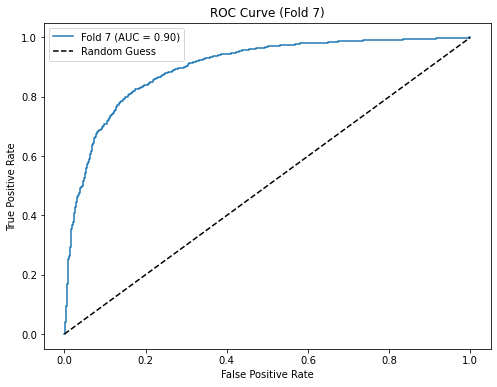


===== Fold 8 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.529298	eval's binary_logloss: 0.544088
[20]	train's binary_logloss: 0.452554	eval's binary_logloss: 0.476689
[30]	train's binary_logloss: 0.408776	eval's binary_logloss: 0.439755
[40]	train's binary_logloss: 0.381623	eval's binary_logloss: 0.419019
[50]	train's binary_logloss: 0.364112	eval's binary_logloss: 0.406281
[60]	train's binary_logloss: 0.352989	eval's binary_logloss: 0.399416
[70]	train's binary_logloss: 0.344877	eval's binary_logloss: 0.396017
[80]	train's binary_logloss: 0.339074	eval's binary_logloss: 0.393283
[90]	train's binary_logloss: 0.334497	eval's binary_logloss: 0.391832
[100]	train's binary_logloss: 0.329954	eval's binary_logloss: 0.391648
[110]	train's binary_logloss: 0.326261	eval's binary_logloss: 0.391439
[120]	train's binary_logloss: 0.322727	eval's binary_logloss: 0.390653
[130]	train's binary_logloss: 0.319841	eval's binary_logloss: 0.39034
[140]	

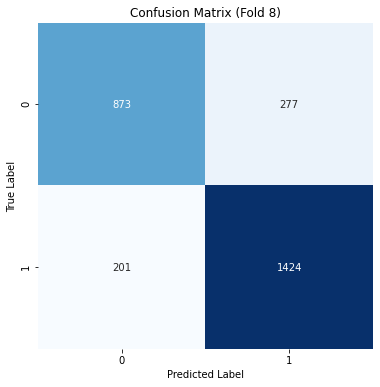

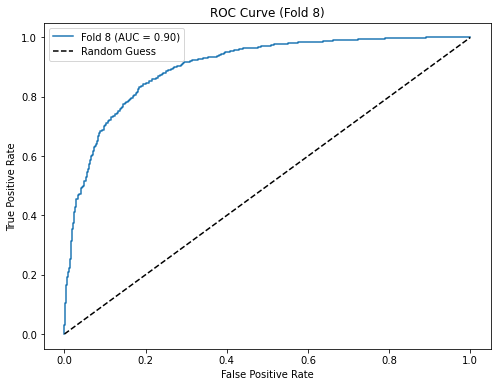


===== Fold 9 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.530507	eval's binary_logloss: 0.53856
[20]	train's binary_logloss: 0.453823	eval's binary_logloss: 0.466523
[30]	train's binary_logloss: 0.410676	eval's binary_logloss: 0.426337
[40]	train's binary_logloss: 0.383587	eval's binary_logloss: 0.40273
[50]	train's binary_logloss: 0.366483	eval's binary_logloss: 0.388797
[60]	train's binary_logloss: 0.355407	eval's binary_logloss: 0.381197
[70]	train's binary_logloss: 0.347422	eval's binary_logloss: 0.376589
[80]	train's binary_logloss: 0.341445	eval's binary_logloss: 0.373279
[90]	train's binary_logloss: 0.336645	eval's binary_logloss: 0.371523
[100]	train's binary_logloss: 0.33237	eval's binary_logloss: 0.37015
[110]	train's binary_logloss: 0.328572	eval's binary_logloss: 0.369779
[120]	train's binary_logloss: 0.325292	eval's binary_logloss: 0.369508
[130]	train's binary_logloss: 0.322058	eval's binary_logloss: 0.36935
[140]	trai

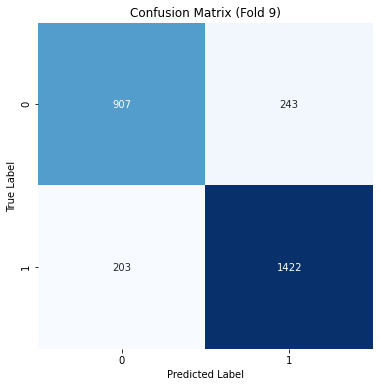

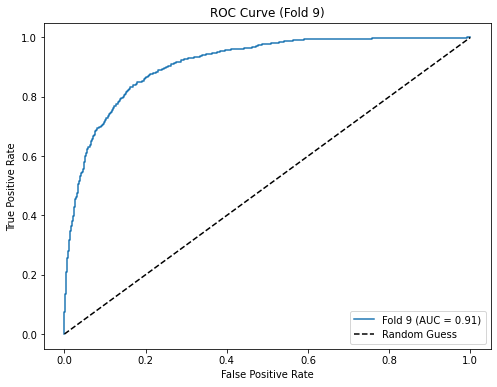


===== Fold 10 =====
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.529998	eval's binary_logloss: 0.538948
[20]	train's binary_logloss: 0.452919	eval's binary_logloss: 0.46769
[30]	train's binary_logloss: 0.409503	eval's binary_logloss: 0.428276
[40]	train's binary_logloss: 0.382867	eval's binary_logloss: 0.404763
[50]	train's binary_logloss: 0.365731	eval's binary_logloss: 0.390817
[60]	train's binary_logloss: 0.354857	eval's binary_logloss: 0.382708
[70]	train's binary_logloss: 0.347083	eval's binary_logloss: 0.377244
[80]	train's binary_logloss: 0.341178	eval's binary_logloss: 0.37482
[90]	train's binary_logloss: 0.336326	eval's binary_logloss: 0.37296
[100]	train's binary_logloss: 0.332328	eval's binary_logloss: 0.371631
[110]	train's binary_logloss: 0.328475	eval's binary_logloss: 0.371024
[120]	train's binary_logloss: 0.325216	eval's binary_logloss: 0.370559
[130]	train's binary_logloss: 0.321728	eval's binary_logloss: 0.369909
[140]	t

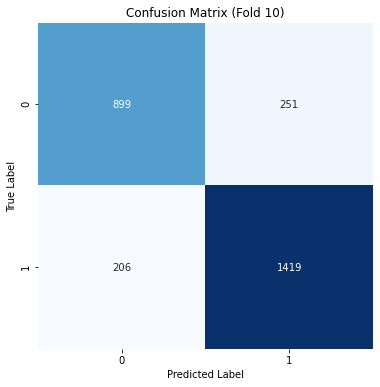

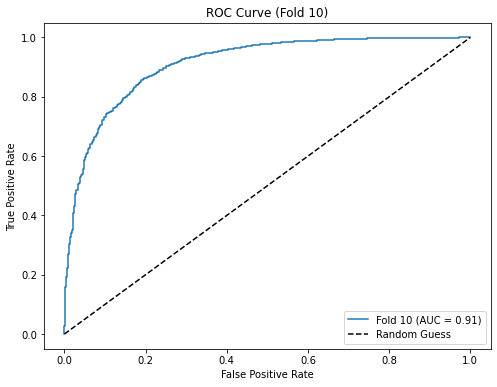


===== 10-Fold Cross-Validation Results =====
   Fold  Accuracy  Precision    Recall  F1-Score       AUC
0     1  0.835014   0.850962  0.870849  0.860790  0.906373
1     2  0.831412   0.854345  0.858549  0.856442  0.909722
2     3  0.832133   0.849819  0.866544  0.858100  0.904564
3     4  0.829611   0.850456  0.860394  0.855396  0.907238
4     5  0.815202   0.847595  0.834563  0.841029  0.890783
5     6  0.833514   0.850602  0.868389  0.859404  0.905186
6     7  0.824505   0.846622  0.855474  0.851025  0.899291
7     8  0.827748   0.837155  0.876308  0.856284  0.900356
8     9  0.839279   0.854054  0.875077  0.864438  0.912176
9    10  0.835315   0.849701  0.873231  0.861305  0.911344

===== Mean Results =====
Fold         5.500000
Accuracy     0.830373
Precision    0.849131
Recall       0.863938
F1-Score     0.856421
AUC          0.904703
dtype: float64

===== Std Results =====
Fold         3.027650
Accuracy     0.006761
Precision    0.004849
Recall       0.012534
F1-Score     0.0065

In [94]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE


# 初始化存儲交叉驗證結果的 DataFrame
cv_results = []

# 10-fold 交叉驗證
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(data_X, data_y), start=1):
    print(f"\n===== Fold {fold} =====")
    
    # 提取訓練集和測試集
    X_train, X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
    y_train, y_test = data_y.iloc[train_idx], data_y.iloc[test_idx]
    
    # 對訓練集進行類別平衡
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # 調整成LightGBM 需要的 Dataset 格式
    lgb_train = lgb.Dataset(X_train_resampled, label=y_train_resampled)
    lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
    
    # 設置早停條件和記錄評估結果
    evals_result = {}
    callbacks = [
    lgb.early_stopping(stopping_rounds=50), # 如果模型在連續 50 次迭代中，驗證集的評估指標沒有改善，訓練將提前結束。
    lgb.log_evaluation(period=10), # 每 10 次迭代打印一次訓練過程的評估指標。
    lgb.record_evaluation(evals_result) # 記錄評估結果
    ]
    
    # 訓練模型
    gbm = lgb.train(
    params=params,  # 帶入超參數設定
    train_set=lgb_train,  # 選擇訓練資料
    valid_sets=[lgb_train, lgb_eval],
    valid_names=["train", "eval"],
    num_boost_round=1000, # 控制總共要建立1000棵決策樹
    callbacks=callbacks
    )
    
    # 預測
    y_pred_prob = gbm.predict(X_test)  # 預測機率
    y_pred = (y_pred_prob > 0.5).astype(int)  # 根據閾值 0.5 進行分類
    
    # 評估指標
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # 繪製混淆矩陣
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix (Fold {fold})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # 繪製 ROC 曲線
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Fold {fold} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title(f'ROC Curve (Fold {fold})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    # 保存每一折的結果
    cv_results.append({
        'Fold': fold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })

# 將結果轉為 DataFrame
cv_results_df = pd.DataFrame(cv_results)

# 打印平均結果
print("\n===== 10-Fold Cross-Validation Results =====")
print(cv_results_df)
print("\n===== Mean Results =====")
print(cv_results_df.mean())
print("\n===== Std Results =====")
print(cv_results_df.std())
